In [ ]:
URL = 'https://www.amazon.com/PlayStation-5-Console/product-reviews/B08FC5L3RG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

def LoadPackages():
    # Load Core Packages:
    global pd, time, plt
    import pandas as pd 
    import matplotlib.pyplot as plt
    import time

    # Load Selenium Packages:
    global webdriver, By, WebDriverWait, Select, EC, TimeoutException, Keys
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait, Select
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.common.exceptions import TimeoutException
    from selenium.webdriver.common.keys import Keys

    # Load Natural Language Processing Packages:
    global re, word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer, WordCloud, stopwords
    import re
    from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
    from wordcloud import WordCloud
    from nltk.corpus import stopwords


def AssignSession():
    global command_url, session_id
    command_url = f'driver.command_executor._url: {driver.command_executor._url}'.split( )[1]
    session_id = f'driver.session_id: {driver.session_id}'

def WebDriver():
    global driver
    driver = webdriver.Chrome(r'C:\Users\Ahicks88\Documents\Briefcase\Analytics\GitHub\Tools-References\Tools\chromedriver')

def WebDriverContinue():
    global driver2
    driver2 = webdriver.Remote(command_executor=command_url)  
    if driver2.session_id != session_id:
        driver2.close()
        driver2.quit()   
    driver2.session_id = session_id

In [2]:
LoadPackages()
WebDriver()
driver.get(URL)
AssignSession()

In [3]:
WebDriverContinue()

reviews = []

# Skipped first 10 reviews because the format of the HTML alternates from [1] to [2] once you get to the second page for the review format variable.
driver.find_element_by_xpath('//*[@id="cm_cr-pagination_bar"]/ul/li[2]/a').click()
time.sleep(1)  

# Loops through all pages available for reviews of product
while True:
    j = 1
    # Loops through all 10 reviews available per page and stores it into the reviews list
    for j in range (2,12):
        try:
            review = driver.find_element_by_xpath('/html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{}]/div/div/div[4]/span/span'.format(j)).text
            reviews.append(review)
            j += 1
        except:
            pass
    try:    
        driver.find_element_by_xpath('//*[@id="cm_cr-pagination_bar"]/ul/li[2]/a').click()
        time.sleep(0.5) 
    except:
        break
    
print('{} reviews were added to the dataset.'.format(len(reviews)))

2040 reviews were added to the dataset.


In [5]:
# Look at nth review in the dataset:
# reviews[0]

# Convert list into a single string
soup = "".join(reviews) 

# Look at head end of soup
# print(soup[:100])

# Look at tail end of soup
# print(soup[-100:])

In [9]:
# Transform data
# tokenized_soup = word_tokenize(soup);
tokenized_soup = re.findall('\w+', soup)
tokenized_soup = [n.lower() for n in tokenized_soup]

print('-' * 48)
print('Dataset Summary')
print('-' * 48)
summary_reviews = len(reviews);                     print('There are {} reviews in the dataset'.format(summary_reviews));
summary_sentences = len(sent_tokenize(soup));       print('There are {} sentences in the dataset'.format(summary_sentences));
summary_words = len(tokenized_soup);                print('There are {} words in the soup'.format(summary_words));
summary_distinctwords = len(set(tokenized_soup));   print('There are {} distinct words in the soup'.format(summary_distinctwords))

print('-' * 48)
KPI_Avg_sent_review = round(summary_sentences/summary_reviews,2);       print('There is an average of {} sentences per review'.format(KPI_Avg_sent_review));
KPI_Avge_word_review = round(summary_words/summary_reviews,2);          print('There is an average of {} words per review'.format(KPI_Avge_word_review));

------------------------------------------------
Dataset Summary
------------------------------------------------
There are 2040 reviews in the dataset
There are 4998 sentences in the dataset
There are 92172 words in the soup
There are 6408 distinct words in the soup
------------------------------------------------
There is an average of 2.45 sentences per review
There is an average of 45.18 words per review


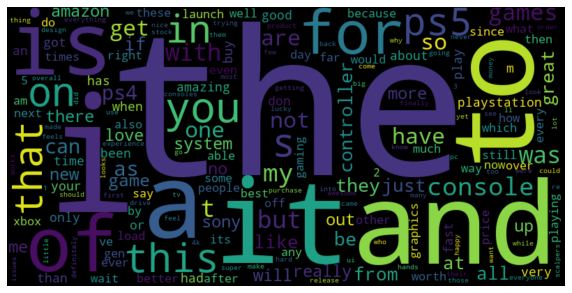

In [86]:
wordcloud = pd.DataFrame(set(list(zip(tokenized_soup, wordfreq)))).sort_values(1 ,ascending = False)[0:50]
wc = wordcount.set_index(0).to_dict()[1]
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(wc)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

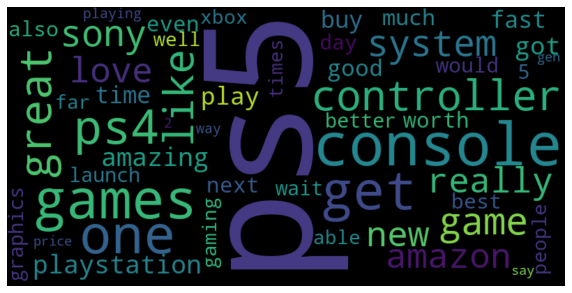

In [110]:
# Removing Stopwords
wordcloud = pd.DataFrame(set(list(zip(tokenized_soup, wordfreq)))).sort_values(1 ,ascending = False)
stop_words = stopwords.words('english')
sentence = wordcloud.values.tolist()
sentence = [[word, count] for word, count in sentence if word not in stop_words][0:50]

wc = pd.DataFrame(sentence).set_index(0).to_dict()[1]
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(wc)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()